Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions, as well as your name and collaborators below:

In [ ]:
NAME = ""  # your uniqname 
COLLABORATORS = c()  # vector of uniqnames of your collaborators, if any
## IMPORTANT: you must also have set your group on Canvas. This is only used as a backup.

---

In [ ]:
library(tidyverse)
library(stringr)
stopif = function(x, ...) { stopifnot(! x, ...)}

# STATS 306
## Problem set 6: Strings and regular expressions
Each problem is worth two to four points, depending on difficulty, for a total of 20.

*Note*: you do not need to use `install.packages()` in this notebook. You may assume that we have already installed all of the necessary packages when we run your code.

#### Problem 1
Write a regular expression which matches words of the form `DcccccD`, where `D` is any digit and `c` is any lower case letter. The first and last digits do not have to be the same. Store your regular expression in a variable called `re1`.

In [ ]:
re1 = NA
# YOUR CODE HERE
stop()

In [ ]:
matches = c("1abcde2", "1abcde1", "0fooof0")  # these should match
antimatches = c("f12300f", "any old words", "1a1", "2111112", "1234567890")  # these should not match
stopifnot(all(str_detect(matches, re1)))
stopif(any(str_detect(antimatches, re1)))

#### Problem 2
The *word-boundary* character class `\b` matches the beginning and end of a word:

In [ ]:
str_view_all("These are some words.", "\\b")

Use this character class to write a regular expression `re2` such that `str_count(s, re2)` counts the number of words in the string `s`. Here a word is defined a consecutive string of letters, numbers or underscores.

In [ ]:
# YOUR CODE HERE
stop()

In [ ]:
stopifnot(all(
    str_count(
        c(
            "This sentence has five words.",
            "   three words here!",
            "\tfour words found here...",
            "hypenated-words count as two,",
            "but under_scores do not",
            "but isn't it true that contractions do? -- yes!"
         ),
        re2) == 
    c(5, 3, 4, 5, 4, 9)
))

#### Problem 3
Write a regular expression which matches any word containing exactly two vowels, regardless of case. Store this regular expression in a variable named `re3`.

*Hint*: See `?stringr::regex` for documentation on how to produce a case-insensitive regexp.

In [ ]:
# YOUR CODE HERE
stop()

In [ ]:
stopifnot(all(
    str_detect(
        c("one", "thrEe", "FOur", "FIVE", "seVen", "Eight", "nine"),
        re3
        )
    )
)

stopif(any(
    str_detect(
        c("two", "SIX", "TEN", "THirteeN"),
        re3
    )
))


#### Problem 4
Write a regular expression which matches proper nouns. A proper noun is defined as one or more capitalized words, optionally separated by the word(s) "and", "of", "the", and/or "by".  Store your expression in a variable called `re4`. (If a capitalized word occurs at the beginning of a sentence, you may assume it is part of a proper noun.)

In [ ]:
re4 = NA
# YOUR CODE HERE
stop()

In [ ]:
proper_nouns = c("Jabba the Hut", "Pizza Hut", 
                 "Pizza the Hut", "Chicken of the Sea",
                 "Dolce and Gabbana", "Roger Federer",
                 "A Streetcar Named Desire", "Twitter")
not_proper_nouns = c("no proper nouns here.",
                     "tennis is the best",
                     "i heart burritos!")
stopifnot(all(identical(proper_nouns,
                        str_extract(str_c("intro ", proper_nouns, " outro."), re4)
                        )))
stopifnot(all(identical(str_c("Proper ", proper_nouns),
                        str_extract(str_c("Proper ", proper_nouns, " outro."), re4)
                        )))
stopifnot(identical(
    str_extract_all("I heart Huckabees", re4),
    list(c("I", "Huckabees"))))

stopifnot(! any(str_detect(not_proper_nouns, re4)))

#### Problem 5
Write a regular expression to match phone numbers. A phone number can be in any one of the following forms:
```
(123) 456-7890
(123)456-7890
1234567890
123 456 7890
123-456-7890
123.456.7890
```
Store your regular expression in a variable called `re5`.

In [ ]:
# YOUR CODE HERE
stop()

In [ ]:
phone_nums = c(
    "(123) 456-7890", "(123)456-7890", "1234567890",
    "123 456 7890", "123-456-7890", "123.456.7890")
not_phone_nums = c("123.456 7890", "123-456.7890", 
                   "(123 456 7890", "a23.b123.c1234",
                   "cleveland rocks"
                  )
stopifnot(all(str_detect(phone_nums, re5)))
stopifnot(! any(str_detect(not_phone_nums, re5)))

#### Problem 6
In lecture we learned about the `str_trim` function, which trims leading and trailing whitespace from a string:

In [ ]:
str_trim("   This will be trimmed ")

Create a regular expression which, for a given string `s`, captures the trimmed version of `s` into group 1. That is, for any string `s`, calling `str_replace(s, re1, "\\1")` should produce the same output as `str_trim(s)`.
Store your expression in a variable called `re6`. 



In [ ]:
# YOUR CODE HERE
stop()

In [ ]:
for (s in c(
    "   this will  be trimmed   ",
    "\t\nso will this\n\t  ",
    "and this too    "
    )) {
    stopifnot(identical(
        str_replace(s, re6, "\\1"),
        str_trim(s)))
    }

### Reddit dataset
The file `reddit_xmas_2017.RData` contains 100,000 comments posted to Reddit on Christmas Day, 2017.

In [ ]:
load('reddit_xmas_2017.RData')
reddit %>% print

Problems 7-9 ask you questions about this data set. Unless specified otherwise, all matches are case insensitive.

(*Disclaimer*: as we are all aware, the internet is filled with terrible people saying awful things. I filtered out objectionable comments as best I could, but you will certainly find more if you dig around this data for long enough.)

### Problem 7
Comment 174 wishes everyone a happy holidays:

In [ ]:
reddit %>% slice(174)

What are other people wishing? Count the first occurrence of the string "Happy `<word>`" or "Merry `<word>`" in the comment body, if any, summarize the matches in a table called `table7`:

<table>
<thead><tr><th scope="col">greeting</th><th scope="col">n</th></tr></thead>
<tbody>
	<tr><td>Merry Christmas</td><td>2040           </td></tr>
	<tr><td>Happy Holidays </td><td> &mdash;           </td></tr>
	<tr><td>Happy To       </td><td>  &mdash;           </td></tr>
	<tr><td>Merry Xmas     </td><td>  &mdash;      </td></tr>
	<tr><td>Happy With     </td><td>   &mdash;           </td></tr>
	<tr><td>Happy Christmas</td><td>   &mdash;           </td></tr>
	<tr><td>Happy For      </td><td>   &mdash;           </td></tr>
	<tr><td>Happy Cake     </td><td>   &mdash;           </td></tr>
	<tr><td>Happy About    </td><td>   &mdash;           </td></tr>
	<tr><td>Happy And      </td><td>   &mdash;           </td></tr>
</tbody>
</table>

In [ ]:
table7 <- NA
# YOUR CODE HERE
stop()

In [ ]:
stopif(is.na(table7))

### Problem 8
The number of hourly mentions of the word `christmas`or `xmas` is:
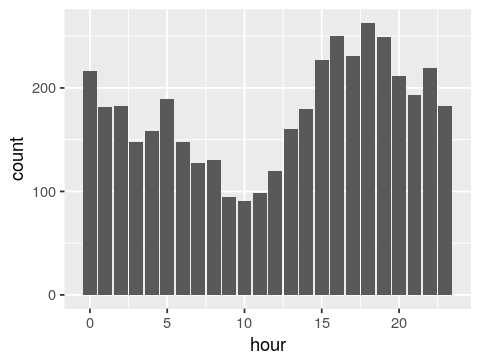

Make a similar plot for hourly mentions of "snow".

In [ ]:
# YOUR CODE HERE
stop()

### Problem 9
For this problem define a word to be alphanumeric characters surrounded by word boundaries, i.e. anything that matches the regular expression `re2` that you defined in problem 2. The most common word in the comments is "the", which occurs 81,104 times.

In [ ]:
reddit %>% mutate(c=str_count(body, regex('\\bthe\\b', ignore_case = T))) %>% summarize(sum(c))

The word `christmas` occurs 4265 times:

In [ ]:
xmas_re <- regex('\\bchristmas\\b', ignore_case = T)
reddit %>% mutate(c=str_count(body, xmas_re)) %>% summarize(sum(c))

The next most common word after "christmas" occurs 4151 times. What word is it? Store your answer in the variable `most_common_10`.

In [ ]:
most_common_10 <- NA
# YOUR CODE HERE
stop()

In [ ]:
stopif(is.na(most_common_10))